In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('airbnb_listing_train.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,NaN,De Baarsjes - Oud-West,52.37194,4.84965,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,NaN,IJburg - Zeeburgereiland,52.36263,4.98031,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,NaN,De Pijp - Rivierenbuurt,52.35719,4.90009,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,NaN,Zuid,52.34855,4.85105,Entire home/apt,2,11,28-04-2019,0.37,1,0,136


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [39]:
df.describe(())

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,1.290100e+04,0.0,12901.000000,12901.000000,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,1.984923e+07,6.321700e+07,NaN,52.365313,4.889744,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,8.010814e+07,NaN,0.016418,0.036016,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,3.592000e+03,NaN,52.289270,4.755720,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
50%,1.874939e+07,2.711601e+07,NaN,52.364570,4.887130,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
max,4.370900e+07,3.490175e+08,NaN,52.425090,5.018400,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
df['room_type'] = le.fit_transform(df['room_type'])

In [41]:
df = df.drop(['id','name','host_name','last_review','reviews_per_month','number_of_reviews','neighbourhood_group'],axis = 1)

In [42]:
df = df.convert_dtypes()
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,3123809,8,52.35368,4.90177,0,3,1,0,220
1,10259430,17,52.35728,4.92052,0,4,1,0,110
2,224969266,5,52.37582,4.8985,0,2,1,7,100
3,693472,20,52.37792,4.873,0,3,1,0,130
4,41888346,20,52.38051,4.87493,2,2,1,24,90


<Axes: >

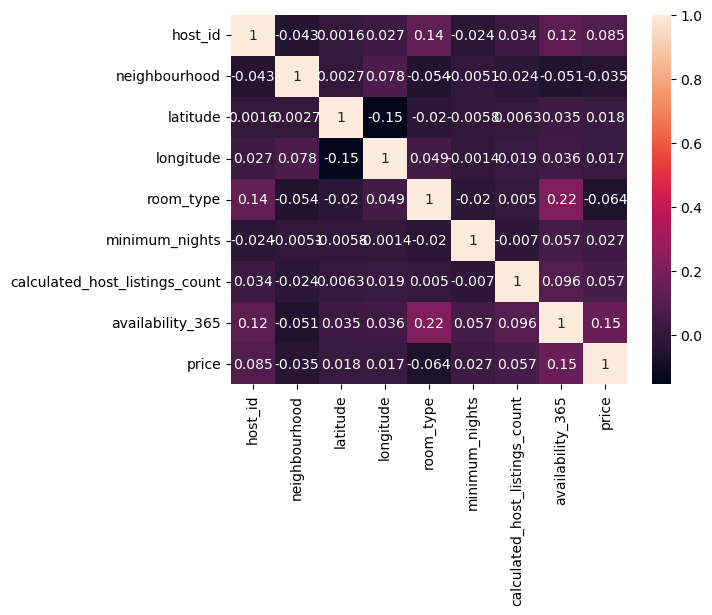

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot = True)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_7460\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

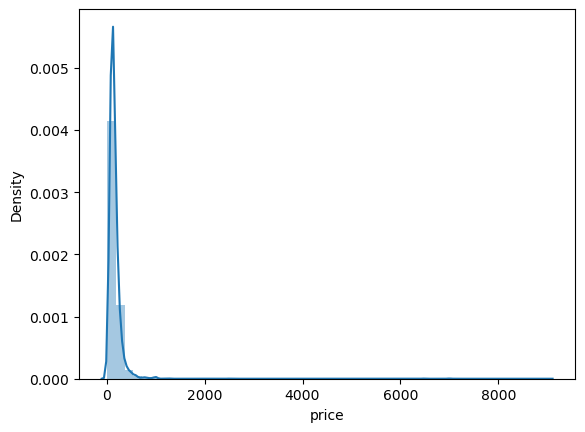

In [44]:
sns.distplot(df['price'])

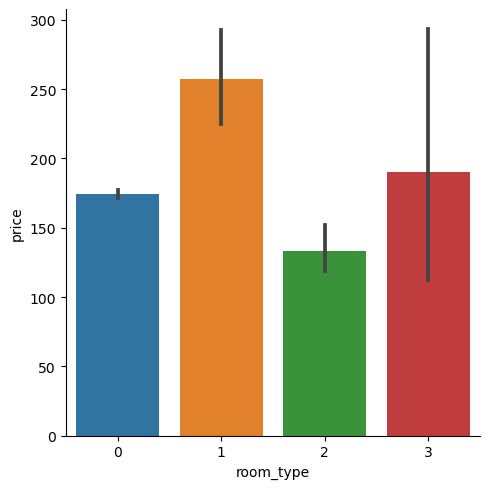

In [45]:
sns.catplot(x = 'room_type',y = 'price',data = df,kind = 'bar')

<Axes: xlabel='price', ylabel='room_type'>

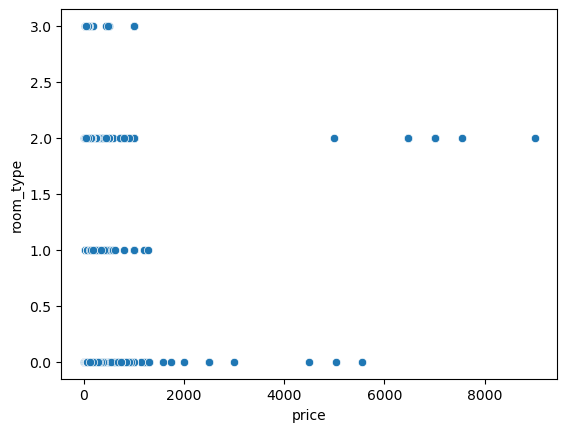

In [46]:
sns.scatterplot(x = 'price', y = 'room_type',data = df)

In [47]:
x = df.drop(['price'],axis = 1)
y = df['price']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knr = KNeighborsRegressor(n_neighbors=8)
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [52]:
y_pred = knr.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

57454.42277702441